# TITANIC : EDA

## Introduction

The titanic.csv. file contains data for 887 of the real Titanic passengers. Each row represents one person.

### Data Field Explanation
 
The columns describe different attributes about the person including :
* **Survived** - no of people survived
* **Pclass** - tells passenger class 
* **Age** - age of each passenger 
* **Siblings/Spouses Aboard** - Brother, Sister, Stepbrother, Stepsister, Husband or Wife of Passenger Aboard Titanic 
* **Parents/Children Aboard** - Mother, Father, Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic 
* **Fare** - Fare paid by passenger

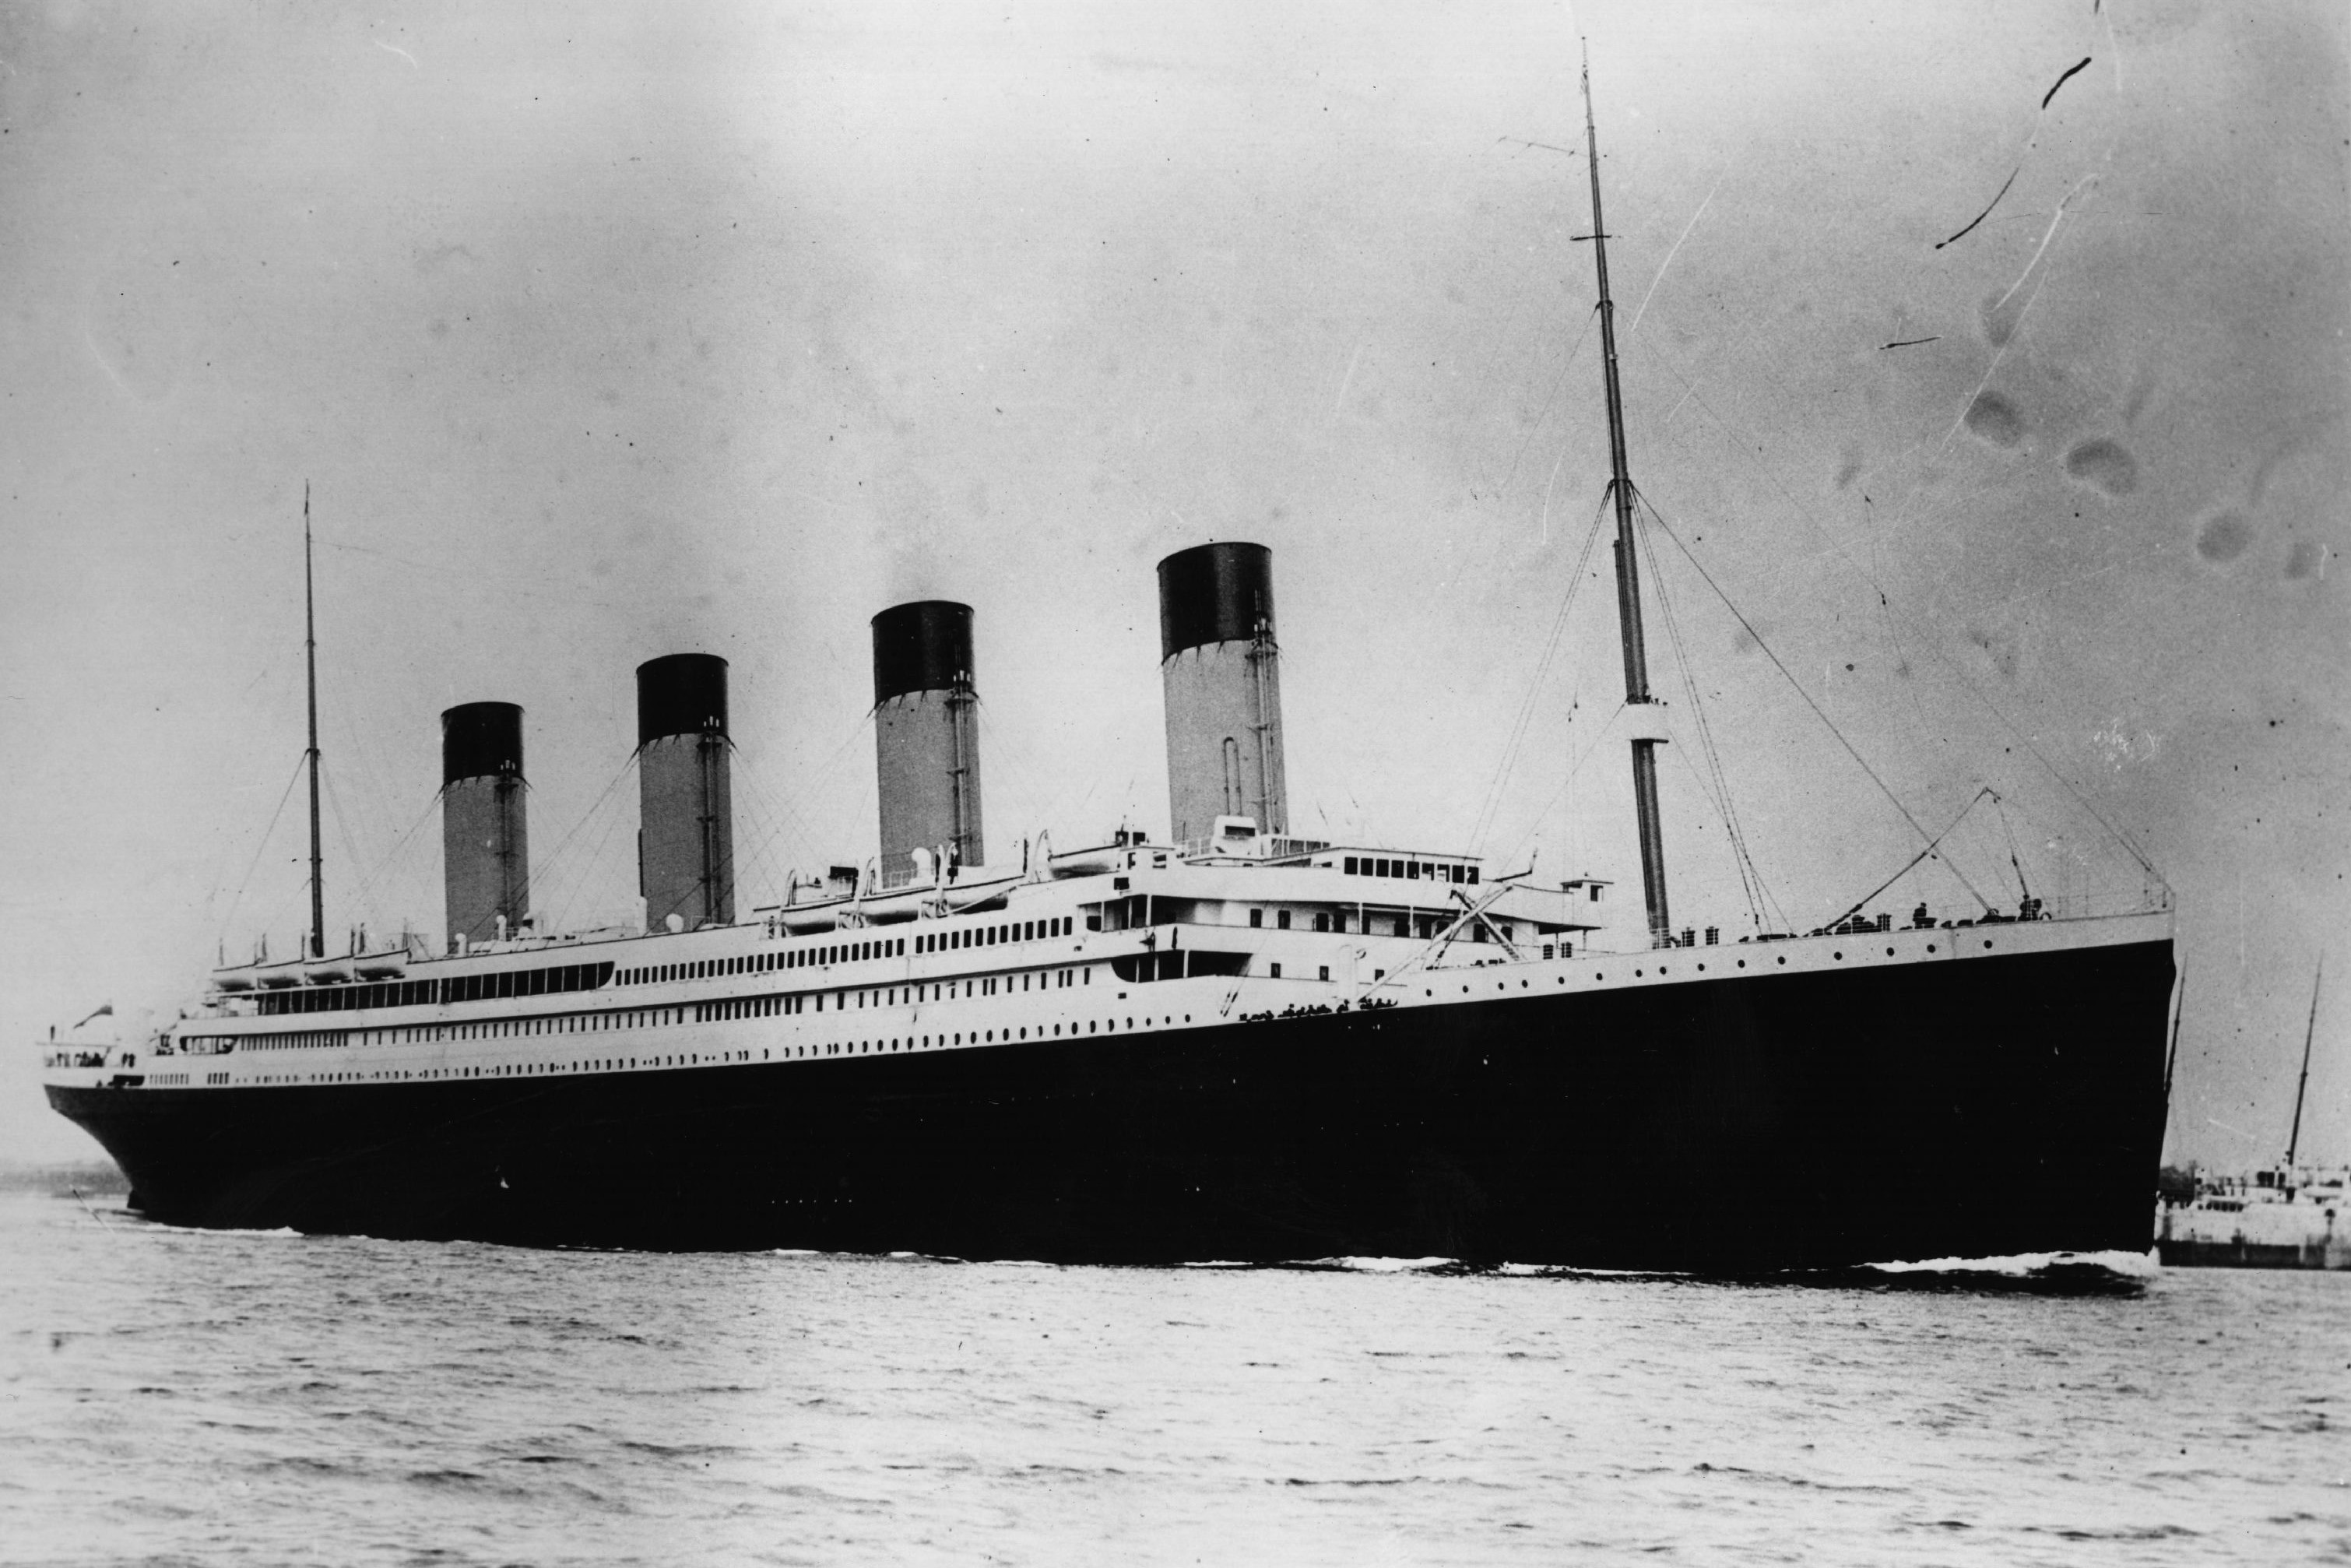

In [8]:
from IPython.display import Image
Image(filename='titanic1.jpg')

# Objective

#### Analysing the data & plot the required graphs to show that these conclusions are true:

    * Pclass and Sex are strong indicators of Survival
    * People at higher class has higher chance to survive
    * Females has much higher survival rates than males
    * Fare associates with Pclass

# Loading the Data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('titanic.csv')
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


**Note** : Function gives the count, mean, std, min, max and IQR values. It excludes character column and calculate summary statistics only for numeric columns


In [13]:
print(df.shape)

(887, 8)


**Note** : Return a tuple representing the dimensionality of the DataFrame

In [15]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


**Note** : Return list of column labels of the DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


**Note** : This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

### Count of the Missing Values

In [18]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

**Note** : Above observation shows that this data do not have any missing values

# Univariate Analysis

#### CountPlot and KDE

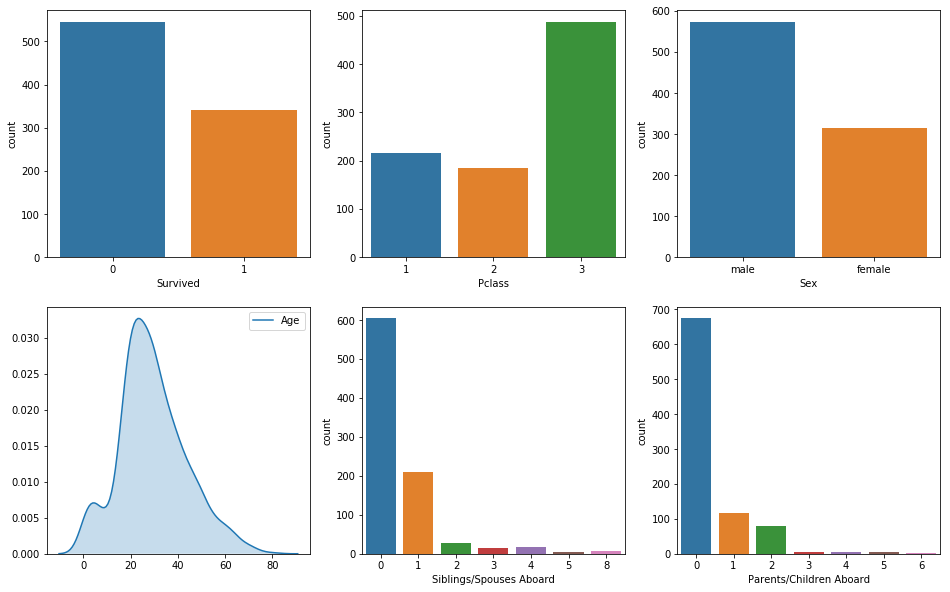

In [20]:
fig,axes =plt.subplots(2,3,figsize=(16,10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.kdeplot(df['Age'],shade=True,ax=axes[1,0])
sns.countplot('Siblings/Spouses Aboard',data=df,ax=axes[1,1])
sns.countplot('Parents/Children Aboard',data=df,ax=axes[1,2])

**Note** : A count plot show the counts of observations in each categorical bin using bars.

### Find Outliers

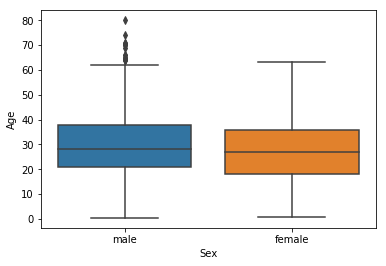

In [21]:
sns.boxplot(x='Sex',y='Age',data=df)

**Observation** : Here age of male can go upto 80 so not considered as an outlier

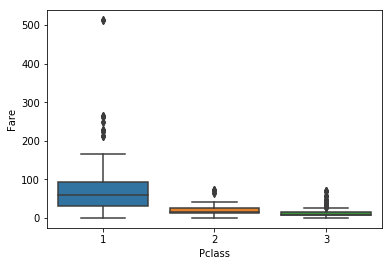

In [24]:
sns.boxplot(x='Pclass',y='Fare',data=df)

**Observation** : *Here variability in fare for first class passengers is showing more existence of some outliers*

# Bivariate Analysis

In [26]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487
All,545,342,887


**Observation** : Above output states following observations
    * For 1st class passengers - survival rate is 62.96%
    * For 2nd class passengers - survival rate is 47.28% 
    * For 3rd class passengers - survival rate is 38.55% 

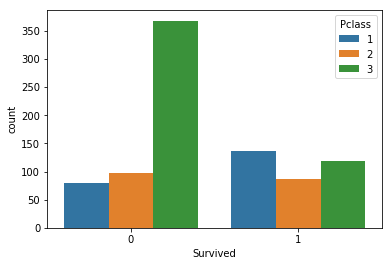

In [27]:
sns.countplot(x='Survived', data=df, hue='Pclass')

**Observation** : *This conclude that most passengers survived from 1st class hence they were prioritise and had more privilege*

In [30]:
pd.crosstab(df['Sex'], df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


**Observation** : 
    * Out of 314 females 233 survived which shows 74.20% females survived
    * Out of 573 males 109 survived which shows 19.02% males survived

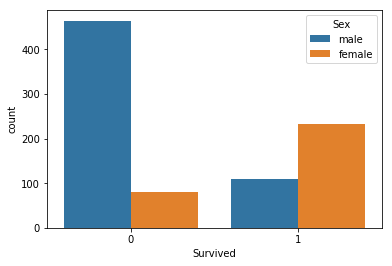

In [31]:
sns.countplot(x='Survived', data=df, hue='Sex')

**Observation** : *Number of females survived are more*

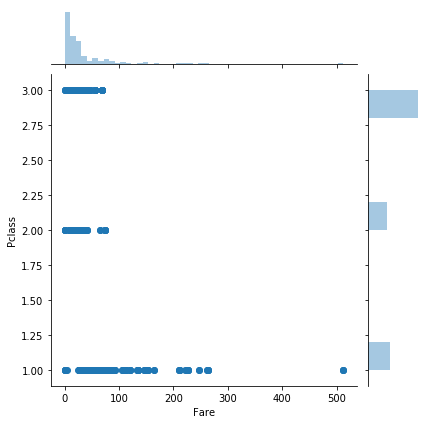

In [38]:
sns.jointplot(x="Fare", y="Pclass", data=df)

**Observation** : *Fare for 1st class passengers are higher*

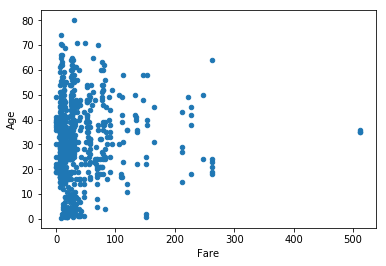

In [49]:
df.plot(kind='scatter',x="Fare", y="Age")

**Observation** : *No strong relationship between Fare and Age is visible*

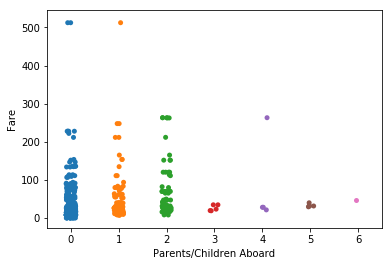

In [48]:
sns.stripplot(x="Parents/Children Aboard", y="Fare",data=df)

**Observation** : *Generally many people did not travel with parents or children, although there seems to be a 'weak' pattern of low fares with more children than higher ones*

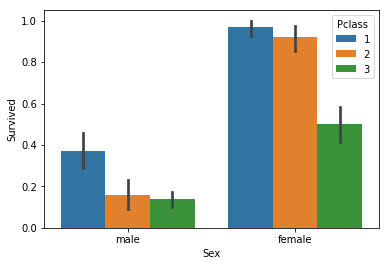

In [52]:
sns.barplot(x='Sex', y='Survived', hue='Pclass',data= df)

**Observation** : *Survival rate for females in 1st class is more*

# Multivariate Analysis

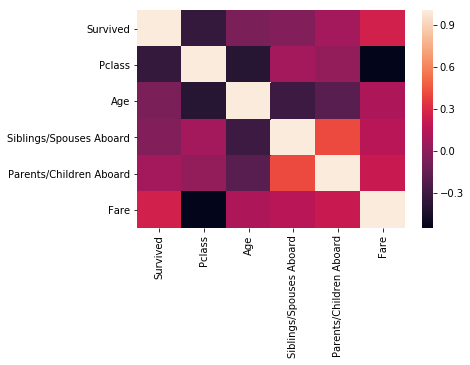

In [59]:
cor_mat = df.corr()

sns.heatmap(cor_mat)

**Observation** :
    * There is a positve co-relation between Fare and Survived
    * Negative co-relation between Pclass and Survived
    * Negative co-relation between Pclass and Fare, Age and Pclass

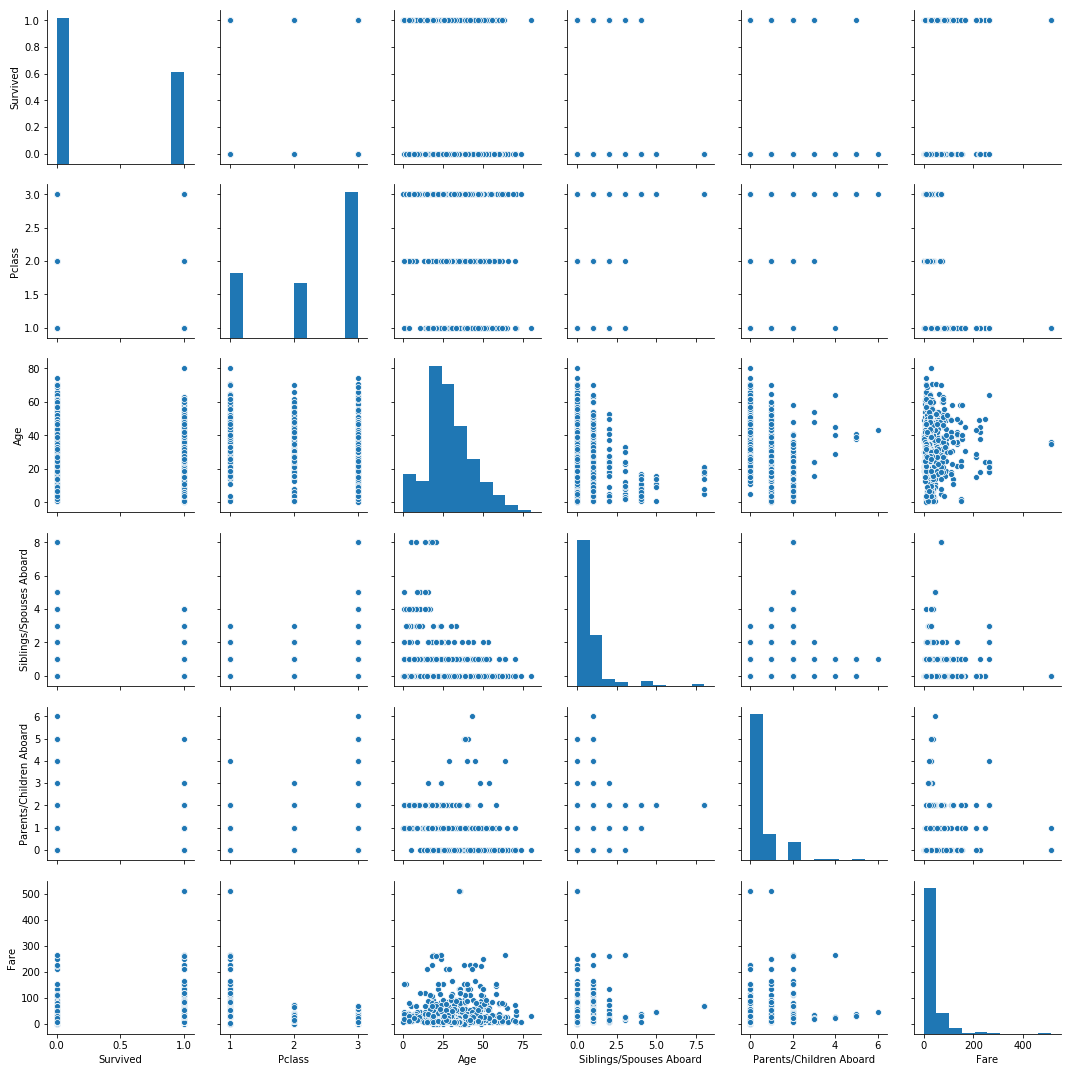

In [68]:
sns.pairplot(df)

## Final Plots

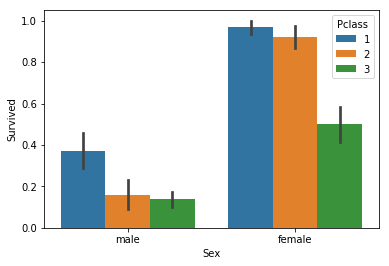

In [70]:
sns.barplot(x='Sex', y='Survived', hue='Pclass',data= df)

**Reasoning** : *Above Observation gives clarity about the fact that Survival rate for females in 1st class is more and Survival rate of females is much higher as compared to males*

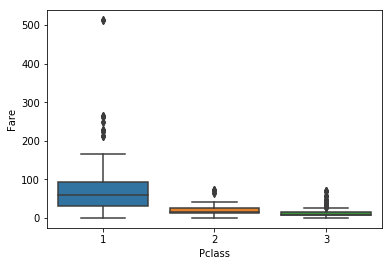

In [71]:
sns.boxplot(x='Pclass',y='Fare',data=df)

**Reasoning** : *This Observation shows different class passengers have different fares and variability in fare for first class passengers is showing more existence of some outliers*

## Summary

  * Pclass and Sex are strong indicators of Survival
  * Survival rate of females is much higher as compared to males and Survival rate for females in 1st class is more
  * Different class passengers have different fares and Fares for 1st class passengers are higher
  * There seems to be a 'weak' pattern of low fares with more children than higher ones
  * No strong relationship between Fare and Age is visible